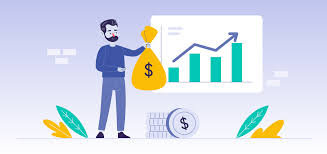

# SALES DATA ANALYSIS

**Objective:**
Consider Sales dataset and analyse it in a proper way.

**Expectation:** need a clarity on who is spending more money for shopping incase of gender,age_group,state,Occupation,Product_category,marital_status.

In [1]:
#Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

df = pd.read_csv('sales_data.csv',encoding="ISO-8859-1")
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


#Data Cleaning

In [3]:
#Removing Status, unnamed1 columns
df = df.drop(["Status","unnamed1"],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [4]:
#Drop Nan values in Amount column
df["Amount"].isnull().sum()
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [5]:
#Handling Gender (M-->Male,F-->Female)
df["Gender"] = df["Gender"].map({'F':"Female", 'M':"Male"})
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [6]:
#Handling Marital_Status  (0-->Single,1-->Married)
df["Marital_Status"]=df["Marital_Status"].map({0:"Single",1:"Married"})
df["Marital_Status"].unique()

array(['Single', 'Married'], dtype=object)

In [7]:
#handling state column
df["State"] = df["State"].str.replace("Andhra\xa0Pradesh","Andhra Pradesh")
df["State"].unique()

array(['Maharashtra', 'Andhra Pradesh', 'Uttar Pradesh', 'Karnataka',
       'Gujarat', 'Himachal Pradesh', 'Delhi', 'Jharkhand', 'Kerala',
       'Haryana', 'Madhya Pradesh', 'Bihar', 'Rajasthan', 'Uttarakhand',
       'Telangana', 'Punjab'], dtype=object)

In [8]:
#Removing Duplicate Rows
df.drop_duplicates(inplace=True)

In [9]:
#Resetting the index
df.reset_index(inplace=True)
df = df.drop("index",axis=1)
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,Female,26-35,28,Single,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,Female,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,Female,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,Male,0-17,16,Single,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,Male,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877.0


In [10]:
#saving cleaned data
df.to_csv("cleaned_sales_data.csv")

#Data Visualization

In [11]:
def data_label(a):
  for i in a.containers:
    a.bar_label(i)

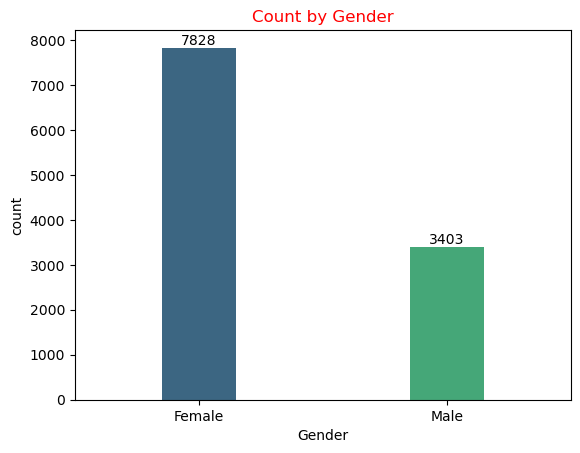

In [12]:
#count by Gender
a = sns.countplot(x="Gender",data=df,hue="Gender",palette="viridis",width=0.3)
plt.title("Count by Gender",color='red')
data_label(a)

**count of female customers is more compared to male**

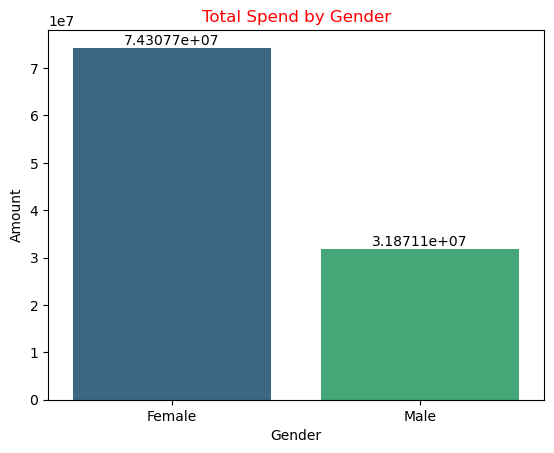

In [13]:
#Total Amount by Gender
gender = df.groupby("Gender")["Amount"].sum()
gender = pd.DataFrame(gender).reset_index()
a = sns.barplot(x="Gender",y="Amount",data=gender,hue="Gender",palette="viridis")
plt.title("Total Spend by Gender",color='red')
data_label(a)

**Female are spending more compared to male**

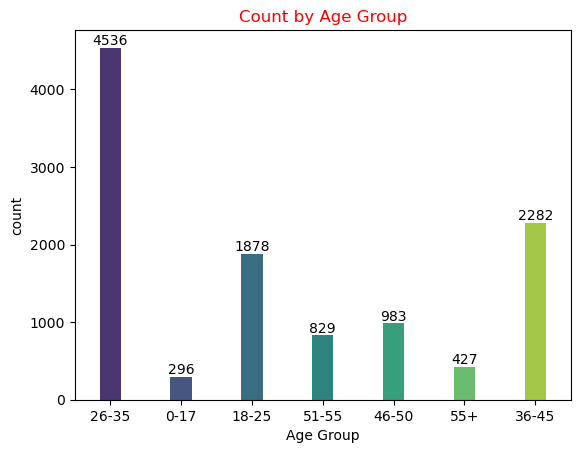

In [14]:
#count by Age group
a = sns.countplot(x="Age Group",data=df,hue="Age Group",palette="viridis",width=0.3)
plt.title("Count by Age Group",color='red')
data_label(a)

**count of Age group 26-35 is more compared to other age groups**

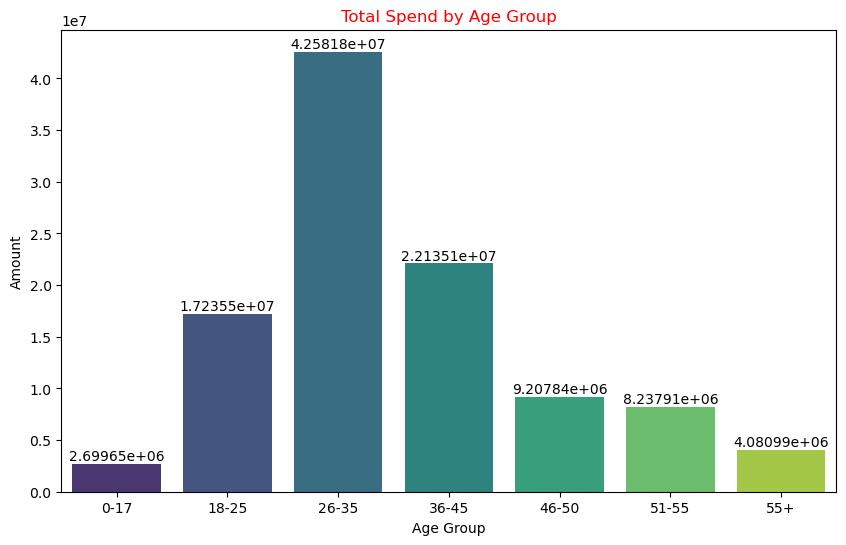

In [15]:
#Total Amount by Age Group
plt.figure(figsize=(10,6))
Age_Group	 = df.groupby("Age Group")["Amount"].sum()
Age_Group	 = pd.DataFrame(Age_Group	).reset_index()
a = sns.barplot(x="Age Group",y="Amount",data=Age_Group	,hue="Age Group",palette="viridis")
plt.title("Total Spend by Age Group",color='red')
data_label(a)

**Age group 26-35 are spending more compared to others**

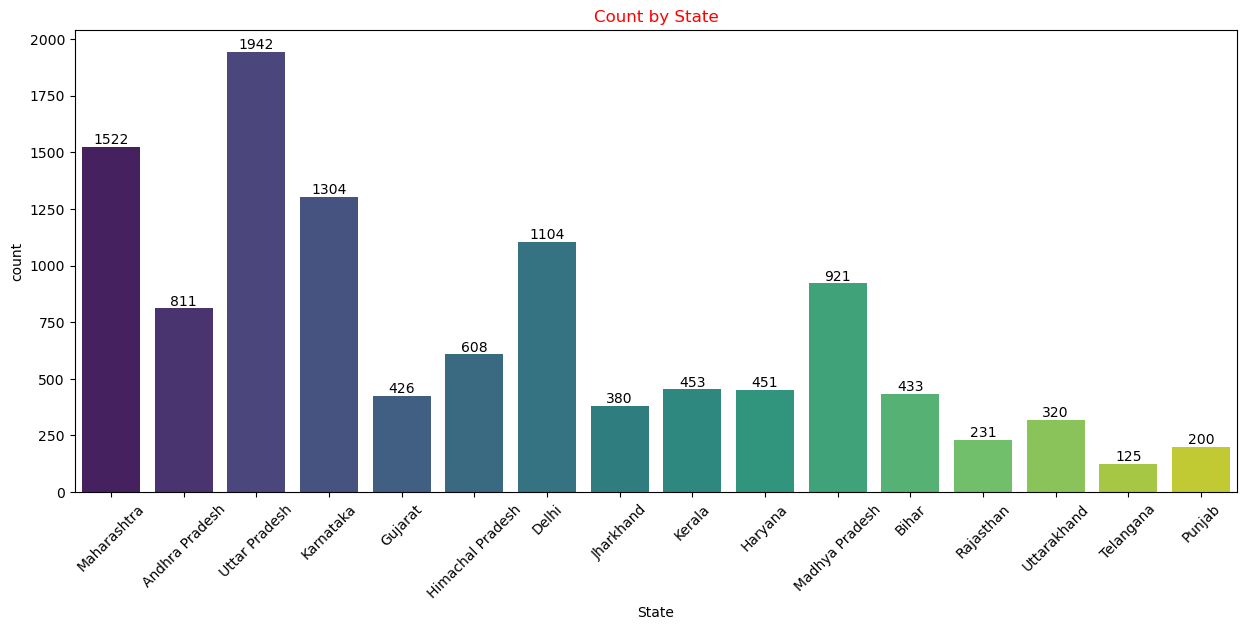

In [16]:
#count by  State
plt.figure(figsize=(15,6))
a = sns.countplot(x="State",data=df,hue="State",palette="viridis")
plt.title("Count by State",color='red')
plt.xticks(rotation=45)
data_label(a)

**The count of customers from Uttarpradesh,Maharashtra,Karnataka,Delhi,Madhya Pradesh is more compared to other states.**

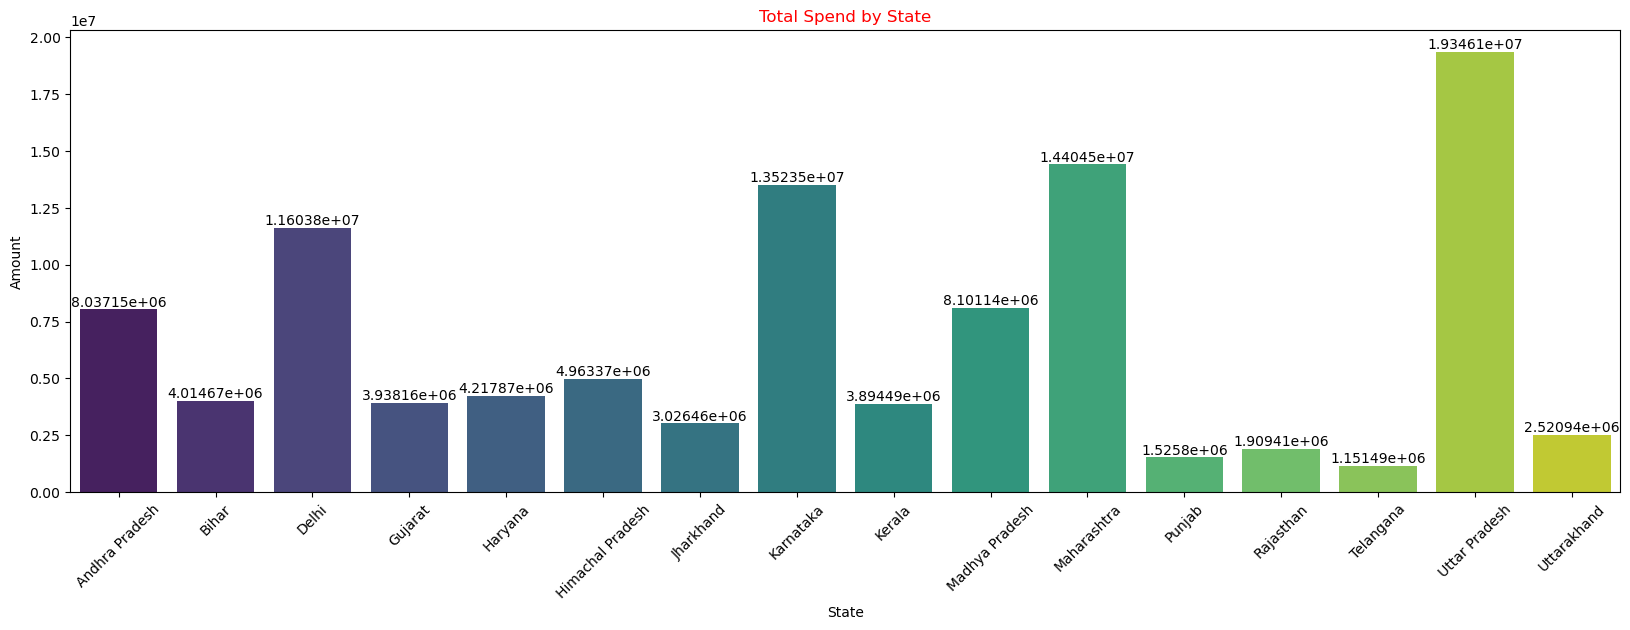

In [17]:
#Total Amount by State
plt.figure(figsize=(20,6))
State	 = df.groupby("State")["Amount"].sum()
State	 = pd.DataFrame(State).reset_index()
a = sns.barplot(x="State",y="Amount",data=State	,hue="State",palette="viridis")
plt.title("Total Spend by State",color='red')
plt.xticks(rotation=45)
data_label(a)

**The Total spend of customers from Uttarpradesh,Maharashtra,Karnataka,Delhi,Madhya Pradesh is more compared to other states.**

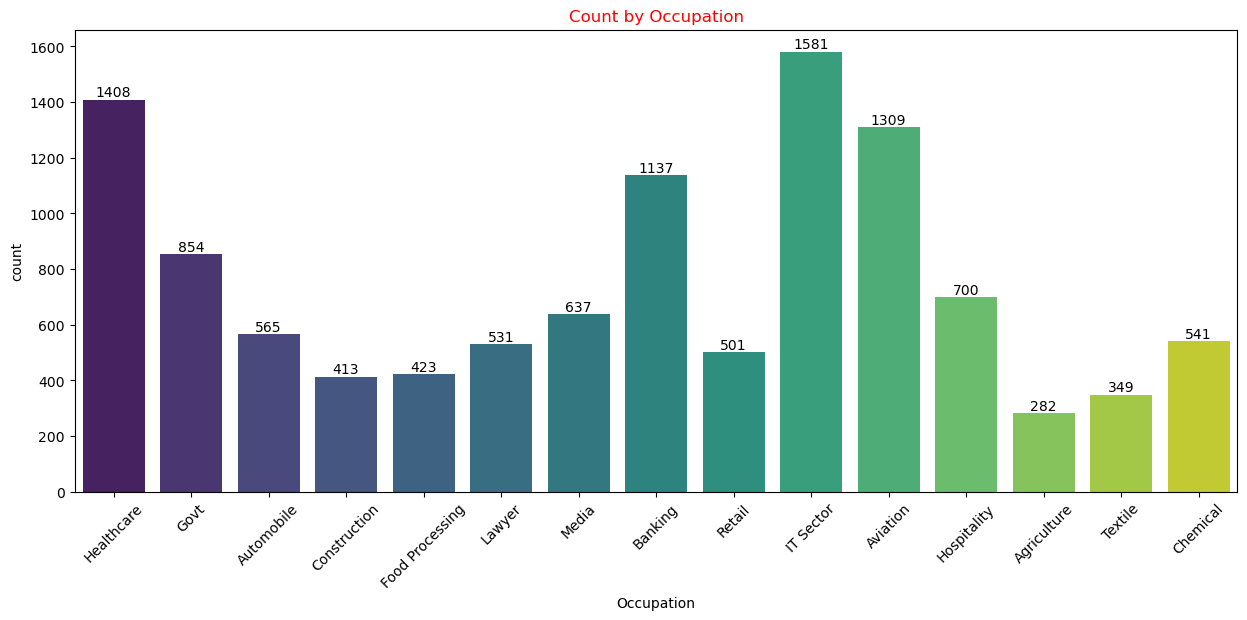

In [18]:
#count by  Occupation
plt.figure(figsize=(15,6))
a = sns.countplot(x="Occupation",data=df,hue="Occupation",palette="viridis")
plt.title("Count by Occupation",color='red')
plt.xticks(rotation=45)
data_label(a)

**count of customers from IT,Healthcare,Aviation,Banking,Govt and Hospitality is more compared to others.**

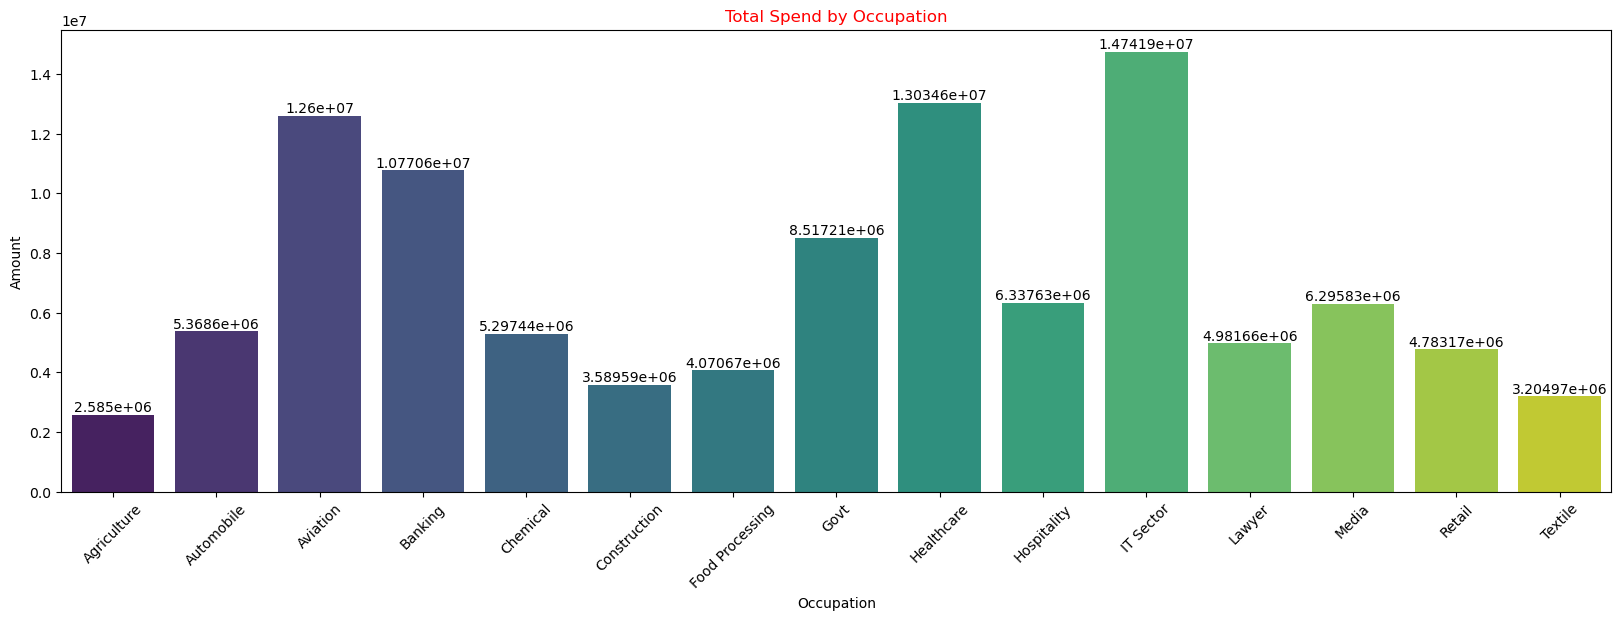

In [19]:
#Total Amount by Occupation
plt.figure(figsize=(20,6))
Occupation	 = df.groupby("Occupation")["Amount"].sum()
Occupation	 = pd.DataFrame(Occupation).reset_index()
a = sns.barplot(x="Occupation",y="Amount",data=Occupation	,hue="Occupation",palette="viridis")
plt.title("Total Spend by Occupation",color='red')
plt.xticks(rotation=45)
data_label(a)

**Total Spend is more in IT,Healthcare,Aviation,Banking,Govt and Hospitality  more compared to others.**

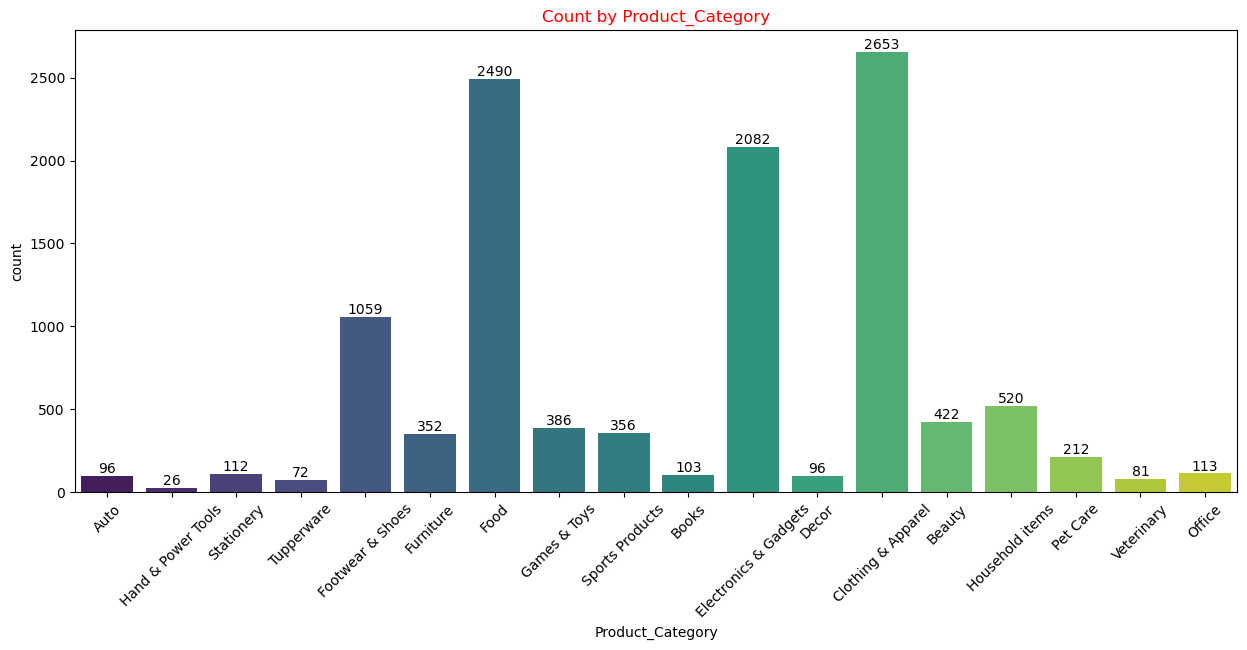

In [20]:
#count by  Product_Category
plt.figure(figsize=(15,6))
a = sns.countplot(x="Product_Category",data=df,hue="Product_Category",palette="viridis")
plt.title("Count by Product_Category",color='red')
plt.xticks(rotation=45)
data_label(a)

**count is more for clothing & apparel, food and electronics and gadgets**

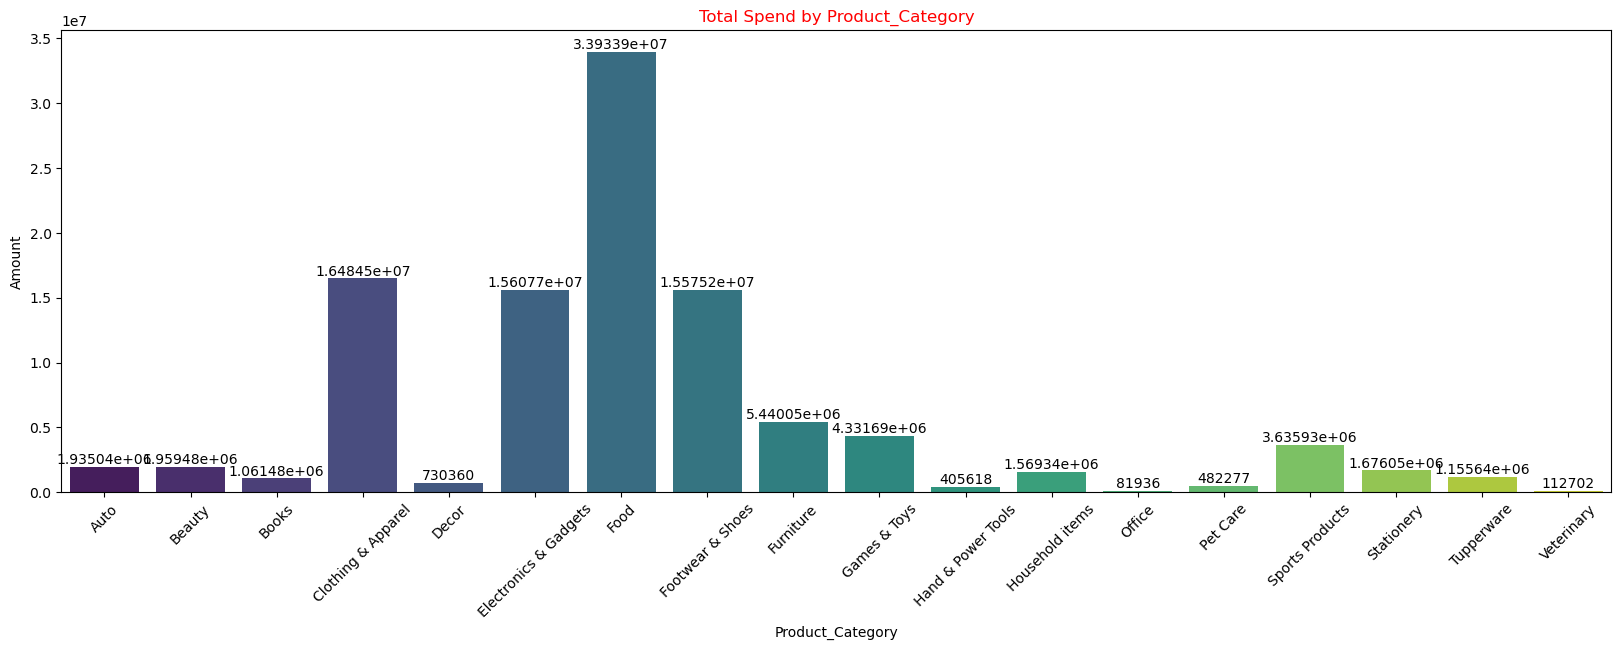

In [21]:
#Total Amount by Product_Category
plt.figure(figsize=(20,6))
Product_Category	 = df.groupby("Product_Category")["Amount"].sum()
Product_Category	 = pd.DataFrame(Product_Category).reset_index()
a = sns.barplot(x="Product_Category",y="Amount",data=Product_Category	,hue="Product_Category",palette="viridis")
plt.title("Total Spend by Product_Category",color='red')
plt.xticks(rotation=45)
data_label(a)

**Most of the people are liking to spend on food,clothing & apparel,electronic gadgets and footwear and shoes**

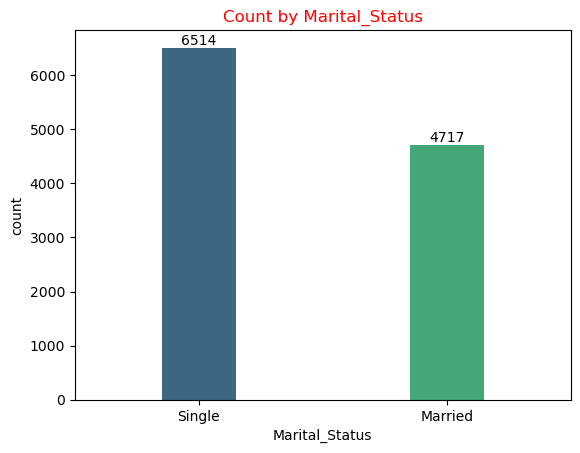

In [22]:
#count by  Marital_Status
a = sns.countplot(x="Marital_Status",data=df,hue="Marital_Status",palette="viridis",width=0.3)
plt.title("Count by Marital_Status",color='red')
data_label(a)

**count of single is more compared to married.**

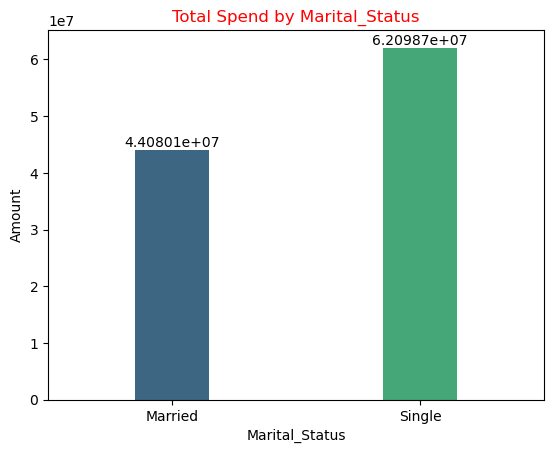

In [23]:
#Total Amount by Marital_Status
Marital_Status	 = df.groupby("Marital_Status")["Amount"].sum()
Marital_Status	 = pd.DataFrame(Marital_Status).reset_index()
a = sns.barplot(x="Marital_Status",y="Amount",data=Marital_Status	,hue="Marital_Status",palette="viridis",width=0.3)
plt.title("Total Spend by Marital_Status",color='red')
data_label(a)

**Customers who are single are spending more on shopping than married.**

# Conclusion:

1. Female are spending more compared to male

2. Age group 26-35 are spending more compared to others

3. The Total spend of customers from Uttarpradesh,Maharashtra,Karnataka,Delhi,Madhya Pradesh is more compared to other states.

4. Total Spend is more in IT,Healthcare,Aviation,Banking,Govt and Hospitality  more compared to others.

5. Most of the people are liking to spend on food,clothing & apparel,electronic gadgets and footwear and shoes.

6. Customers who are single are spending more on shopping than married.